#### 2023-04-24

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from pydataset import data

In [2]:
df = pd.DataFrame({'a' : [8.6, 4.7, 3.8, 2.2, 4.6, 6.9, 4.3, 7.8, 5.6],
                   'b' : [167.4, 250.8, 325.6, 865.2, 754.1, 976, 478.2, 523.9, 602.2]}) 

In [4]:
# sklearn 을 사용하여 정규화, 표준화를 해 봅시다.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
m = MinMaxScaler()
s = StandardScaler()
print(m.fit_transform(df))
print(s.fit_transform(df)) 

[[1.         0.        ]
 [0.390625   0.10314123]
 [0.25       0.1956468 ]
 [0.         0.86297304]
 [0.375      0.72557507]
 [0.734375   1.        ]
 [0.328125   0.38436804]
 [0.875      0.44088548]
 [0.53125    0.53771952]]
[[ 1.66615583 -1.45809291]
 [-0.3574452  -1.13964419]
 [-0.82443005 -0.85403312]
 [-1.65462534  1.20633769]
 [-0.4093324   0.78212124]
 [ 0.78407333  1.62940864]
 [-0.56499402 -0.27135598]
 [ 1.25105818 -0.0968583 ]
 [ 0.10953966  0.20211693]]


In [6]:
diamonds=data('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
# 칼럼 'price'를 100단위로 쪼개어 'price_cat' 새로운 칼럼을 만듭니다.
diamonds['price'].min()
diamonds['price'].max()
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [11]:
bins = list(range(0, 20000, 100))
diamonds['price_cat'] = pd.cut(diamonds['price'], bins)
dia = diamonds 
dia

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(300, 400]"
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(300, 400]"
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(300, 400]"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(300, 400]"
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(300, 400]"
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"(2700, 2800]"
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"(2700, 2800]"
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,"(2700, 2800]"
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,"(2700, 2800]"


In [12]:
# 칼럼 'cut'과 'color'와 'clarity'를 라벨인코딩하세요.
from sklearn.preprocessing import LabelEncoder
l  = LabelEncoder()
l1 = l.fit_transform(dia['cut'])
l2 = l.fit_transform(dia['color'])
l3 = l.fit_transform(dia['clarity'])
print(l1)
print(l2)
print(l3) 

[2 3 1 ... 4 3 2]
[1 1 1 ... 0 4 0]
[3 2 4 ... 2 3 3]


In [ ]:
target을 price_cat으로 하고 :y
price와 price_cat을 제외한 나머지 데이터에 대해 : X
7:3으로 train_set : test_set (X_train, X_test, y_train, y_test)
DecisionTreeClassifier()을 사용하여,
accuracy_score 를 내 봅시다.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X = dia.iloc[:, [0,1,2,3,4,5,7,8,9]]
y = dia['price_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(pred, y_test) 

ValueError: could not convert string to float: 'Ideal'

In [ ]:
레이블 인코딩의 문제점은 무엇인가?
선형회귀에서는 사용할 수 없다.

In [ ]:
표준화와 정규화의 차이는?
평균이 0, 표준편차가 1인 표준정규분포로 만드는 것.
최솟값 0, 최댓값이 1인 상태로 만드는 것.

In [24]:
cake = data('cake')
cake

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215
...,...,...,...,...,...
266,15,C,185,28,185
267,15,C,195,25,195
268,15,C,205,25,205
269,15,C,215,31,215


In [25]:
cake['recipe'] #을 one hot 인코딩으로 바꾸어 주세요

1      A
2      A
3      A
4      A
5      A
      ..
266    C
267    C
268    C
269    C
270    C
Name: recipe, Length: 270, dtype: object

In [28]:
from sklearn.preprocessing import OneHotEncoder
pd.get_dummies(cake['recipe']) 

,A,B,C
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
266,0,0,1
267,0,0,1
268,0,0,1
269,0,0,1


##### 2교시

In [ ]:
precision(정밀도) : TP / TP + FP
recall(재현율) : TP / TP + FN  = sensitivity(민감도)
TPR : TP / TP + FN
FPR : FP / FP + TN
Specificity(특이도) : TN / FP + TN

##### 3교시

In [29]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, confusion_matrix

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [43]:
X = dia.loc[:,['carat','depth','table','price']]
y = dia['cut'].astype('category')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
pred 

array(['Premium', 'Very Good', 'Ideal', ..., 'Good', 'Ideal', 'Premium'],
      dtype=object)

In [46]:
data('titanic')

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [51]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
X = titanic.loc[:,['Pclass','SibSp','Fare']]
y = titanic['Survived']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
pred 

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [56]:
recall_score(y_test, pred)

0.4563106796116505

In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.5222222222222223

In [66]:
def clf_eval(y_true,pred):
    from sklearn.metrics import accuracy_score , precision_score, recall_score, confusion_matrix
    con = confusion_matrix(y_test,pred)
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1 = f1_score(y_test, pred)
    
    print(f'혼동행렬:{con},정확도:{acc},정밀도:{pre},재현율:{rec},f1스코어:{f1}'')

SyntaxError: unterminated string literal (detected at line 9) (1780765788.py, line 9)

In [ ]:
트레이드 오프 trade off

##### 4교시

In [67]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [68]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('숫자 값으로 변환 후 : \n', labels)

숫자 값으로 변환 후 : 
 [0 1 4 5 3 3 2 2]


In [69]:
labels = labels.reshape(-1, 1)
print('2차원 데이터로 변환후 : \n', labels)

2차원 데이터로 변환후 : 
 [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]


In [70]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원 핫 인코딩 데이터 : \n', oh_labels.toarray())
print('원 핫 인코딩 데이터 차원 : \n', oh_labels.shape)

원 핫 인코딩 데이터 : 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 핫 인코딩 데이터 차원 : 
 (8, 6)


##### 5교시

In [71]:
diamonds
X = diamonds.loc[:, ['carat', 'depth', 'table', 'price']]
y = diamonds['cut'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
pred 

array(['Fair', 'Premium', 'Good', ..., 'Ideal', 'Very Good', 'Fair'],
      dtype=object)

In [72]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
X = titanic.loc[:, ['Pclass', 'SibSp' , 'Fare']]
y = titanic['Survived']

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

LR_clf = LogisticRegression(solver='liblinear')
LR_clf.fit(X_train, y_train)

pred = LR_clf.predict(X_test)
pred 

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [82]:
def clf_eval(y_test , pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
    con = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test , pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    
    print(f"혼동행렬: \n {con} \n 정확도 : {acc} \n 정밀도 :  {pre} \n 재현율 : {rec} \n f1스코어 : {f1} \n  ") 

In [83]:
clf_eval(y_test , pred)

혼동행렬: 
 [[141  28]
 [ 64  35]] 
 정확도 : 0.6567164179104478 
 정밀도 :  0.5555555555555556 
 재현율 : 0.35353535353535354 
 f1스코어 : 0.4320987654320988 
  


In [86]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [85]:
LR_clf.predict_proba(X_test)

array([[0.74795878, 0.25204122],
       [0.79096417, 0.20903583],
       [0.74747951, 0.25252049],
       [0.74661264, 0.25338736],
       [0.2520393 , 0.7479607 ],
       [0.59808587, 0.40191413],
       [0.59072031, 0.40927969],
       [0.74640444, 0.25359556],
       [0.41016348, 0.58983652],
       [0.74628247, 0.25371753],
       [0.74633278, 0.25366722],
       [0.20183339, 0.79816661],
       [0.40258997, 0.59741003],
       [0.46961725, 0.53038275],
       [0.7464475 , 0.2535525 ],
       [0.74355908, 0.25644092],
       [0.74633278, 0.25366722],
       [0.6540482 , 0.3459518 ],
       [0.59072031, 0.40927969],
       [0.74595926, 0.25404074],
       [0.45830168, 0.54169832],
       [0.41052129, 0.58947871],
       [0.30479187, 0.69520813],
       [0.35580082, 0.64419918],
       [0.74628247, 0.25371753],
       [0.74628247, 0.25371753],
       [0.74214841, 0.25785159],
       [0.74748672, 0.25251328],
       [0.31964954, 0.68035046],
       [0.74747951, 0.25252049],
       [0.

In [94]:
np.round(LR_clf.predict_proba(X_test)[:,1])

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [96]:
arr = LR_clf.predict_proba(X_test)
# result = np.where(arr < 0.5, 0, 1)[:1]
# sum(y_test==result)/len(result)

##### 6교시

In [98]:
pip install graphviz

     -------------------------------------- 47.0/47.0 kB 584.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import graphviz

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.2)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
iris_data=load_iris()

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True,filled=True)

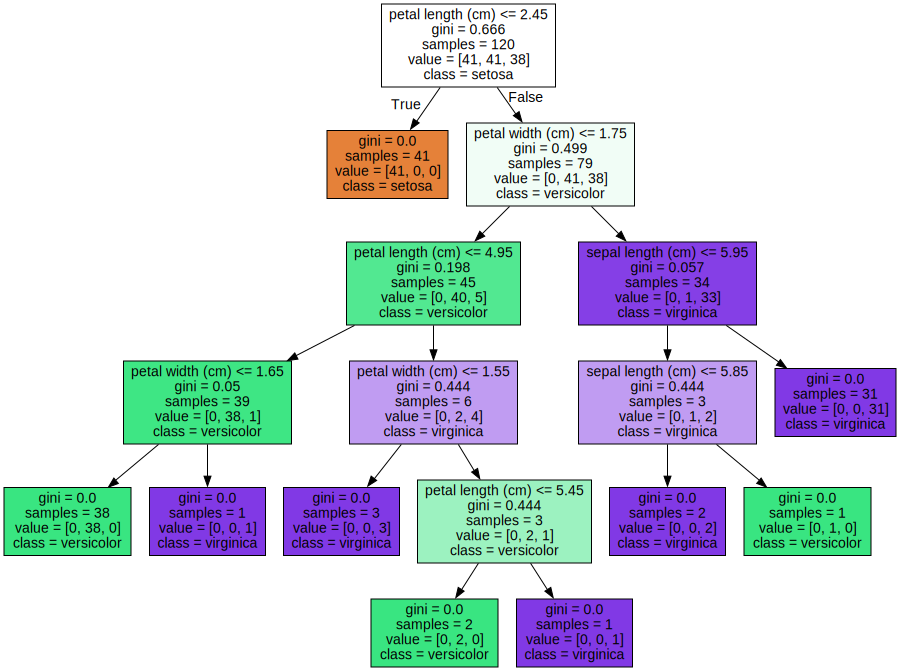

In [7]:
with open('tree.dot')as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)